这个数据来自datacastle的课程：

https://www.dcxueyuan.com/classDetail/classIntroduce/31/page.html

https://static.dcxueyuan.com/content/disk/train/other/9c947c4b-f4ab-415e-932e-6e58d293ebca.html

原数据集来自kaggle：https://www.kaggle.com/harlfoxem/housesalesprediction

## 数据介绍

数据主要包括2014年5月至2015年5月美国King County的房屋销售价格以及房屋的基本信息。
数据分为训练数据和测试数据，分别保存在kc_train.csv和kc_test.csv两个文件中。

- 其中训练数据主要包括10000条记录，14个字段，主要字段说明如下：
- 第一列“销售日期”（date）：2014年5月到2015年5月房屋出售时的日期；
- 第二列“销售价格”（price）：房屋交易价格，单位为美元，是目标预测值；
- 第三列“卧室数”（bedrooms）：房屋中的卧室数目；
- 第四列“浴室数”（bathrooms）：房屋中的浴室数目；
- 第五列“房屋面积”（sqft_living）：房屋里的生活面积；
- 第六列“停车面积”（sqft_lot）：停车坪的面积；
- 第七列“楼层数”（floors）：房屋的楼层数；
- 第八列“房屋评分”（grade）：King County房屋评分系统对房屋的总体评分；
- 第九列“建筑面积”（sqft_above）：除了地下室之外的房屋建筑面积；
- 第十列“地下室面积”（sqft_basement）：地下室的面积；
- 第十一列“建筑年份”（yr_built）：房屋建成的年份；
- 第十二列“修复年份”（yr_renovated）：房屋上次修复的年份；
- 第十三列"纬度"（lat）：房屋所在纬度；
- 第十四列“经度”（long）：房屋所在经度。

（注：比赛所用到的数据取自于kaggle datasets，由@harlfoxem提供并分享。我们只选取了其中的子集，并对数据做了一些预处理使数据更加符合回归分析比赛的要求。）

## 数据准备

Seaborn在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib能制作具有更多特色的图。我们可以将seaborn视为matplotlib的补充来帮助我们更好的作图

网址：http://seaborn.pydata.org/

In [3]:
import warnings
warnings.filterwarnings('ignore') # 忽律一些警告

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 读取数据
columns = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
           'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
           'lat', 'long']

kc_train = pd.read_csv('data/kc_train.csv', names=columns)#路径根据具体情况而定

In [7]:
## 删除日期特征(date)特征
kc_train.drop('date',axis=1,inplace=True)

In [9]:
# 查看数据中是否有NaN
kc_train.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
dtype: int64

In [6]:
kc_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


In [10]:
kc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
price            10000 non-null int64
bedrooms         10000 non-null int64
bathrooms        10000 non-null float64
sqft_living      10000 non-null int64
sqft_lot         10000 non-null int64
floors           10000 non-null float64
grade            10000 non-null int64
sqft_above       10000 non-null int64
sqft_basement    10000 non-null int64
yr_built         10000 non-null int64
yr_renovated     10000 non-null int64
lat              10000 non-null float64
long             10000 non-null float64
dtypes: float64(4), int64(9)
memory usage: 1015.7 KB


In [11]:
# 查看数据集的前5行
kc_train.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


## 数据挖掘和特征工程

先查看我们需要预测的房屋价格的相关信息。

matplotlib.pyplot各参数API文档：https://matplotlib.org/api/pyplot_summary.html

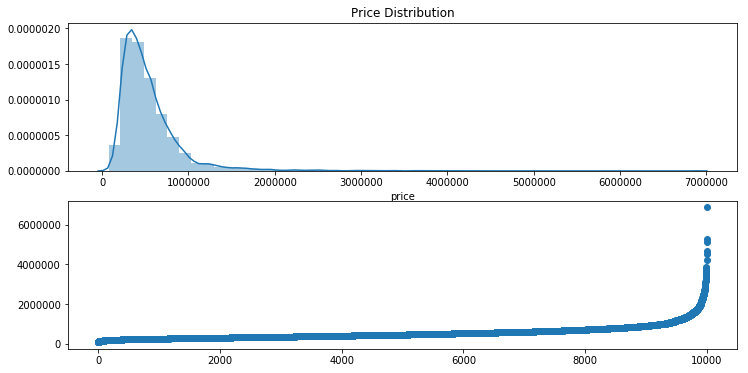

In [14]:
plt.figure(figsize=(12,6))
# 绘制价格的数据分布曲线
plt.subplot(211)
plt.title("Price Distribution")
sns.distplot(kc_train['price'])
# 绘制价格曲线
plt.subplot(212)
plt.scatter(range(kc_train.shape[0]),np.sort(kc_train['price'].values))
plt.show()

In [15]:
# 查看特征的统计信息
kc_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
count,1.000000e+04,10000.000000,10000.0000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.428749e+05,3.367600,2.1168,2082.488400,1.535273e+04,1.502850,7.664800,1791.474900,291.013500,1971.204700,85.209700,47.560629,-122.215845
std,3.729258e+05,0.893169,0.7741,922.878916,4.577623e+04,0.543642,1.173873,829.449437,446.641339,29.322957,403.491421,0.138570,0.139739
min,7.500000e+04,0.000000,0.0000,390.000000,5.720000e+02,1.000000,3.000000,390.000000,0.000000,1900.000000,0.000000,47.159300,-122.519000
25%,3.225000e+05,3.000000,1.7500,1430.000000,5.023250e+03,1.000000,7.000000,1190.000000,0.000000,1951.750000,0.000000,47.471375,-122.329000
50%,4.507000e+05,3.000000,2.2500,1910.000000,7.590000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.572200,-122.234000
75%,6.450000e+05,4.000000,2.5000,2550.000000,1.071700e+04,2.000000,8.000000,2211.500000,560.000000,1997.000000,0.000000,47.678400,-122.127000
max,6.885000e+06,10.000000,7.7500,9890.000000,1.651359e+06,3.500000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000


绘制出各个特征的分布曲线来了解下它们的数据类型。

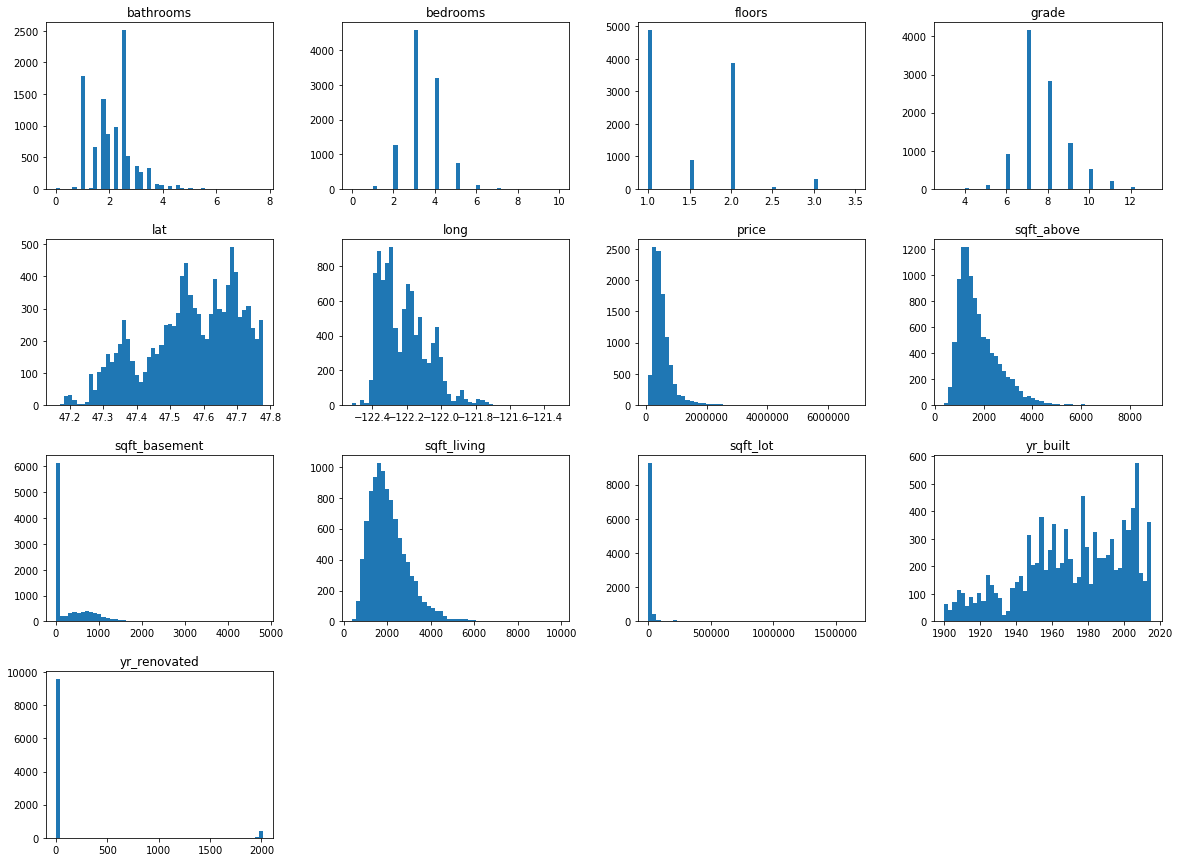

In [16]:
kc_train.hist(figsize=(20,15),bins=50,grid=False)
plt.show()

我们可以注意到以下几种特征都是连续变量：

- lat
- long
- sqft_above
- sqft_basement
- sqft_living
- sqft_lot
- yr_built
- yr_renovated

我们再来分析下几种连续变量与房价之间的相关关系，由于它们都是连续的，所以我们采用Pearson相关系数（相关系数的绝对值越大，相关性越强：相关系数越接近于1或-1，相关度越强，相关系数越接近于0，相关度越弱）来衡量它们的相关程度。

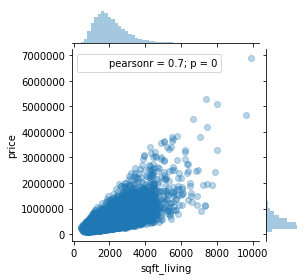

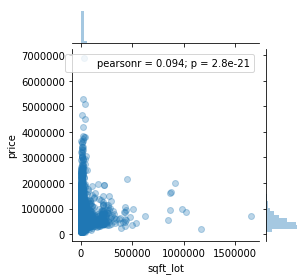

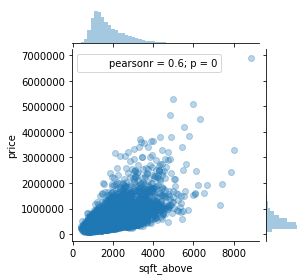

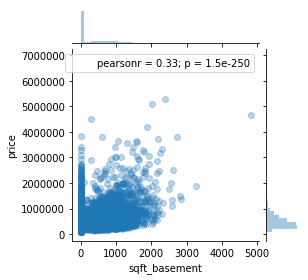

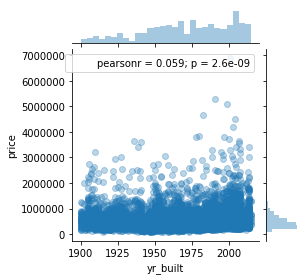

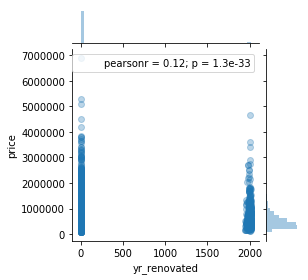

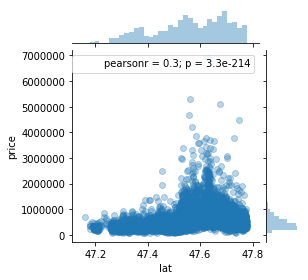

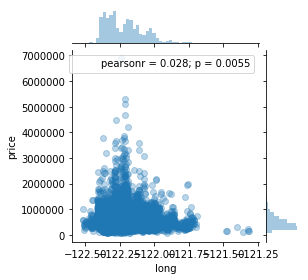

In [18]:
continuous_cols  = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
        'yr_built', 'yr_renovated', 'lat', 'long']

for col in continuous_cols:
    sns.jointplot(x=col, y="price", data=kc_train, alpha=0.3, size=4)

我们可以将这些连续变量与房屋售价之间的相关关系按照Pearson系数进行排序。

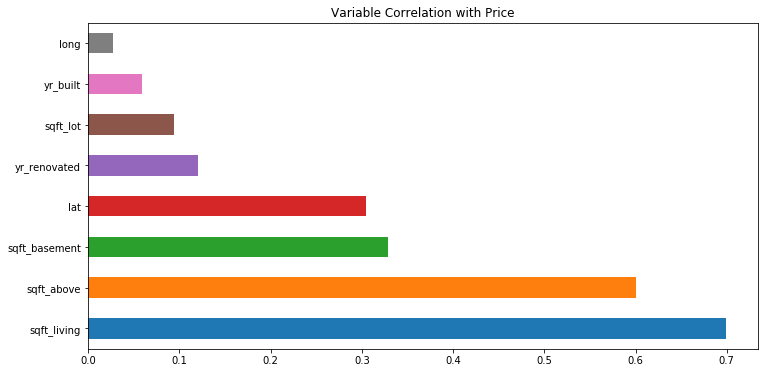

In [20]:
plt.figure(figsize=(12, 6))
kc_train.corr()['price'][continuous_cols].sort_values(ascending=False).plot(
    'barh', figsize=(12, 6), title='Variable Correlation with Price'
)
plt.show()

可以注意到sqft_basement、yr_renovated都有存在很多为0的数据，所以我们可以考虑构建新的二值特征分别用来表示是否有地下室、是否曾翻新过。

In [21]:
kc_train['basement_present'] = kc_train['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
kc_train['renovated'] = kc_train['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

在上面我们构建的basement_present、renovated都是属于分类变量（categorical variable），我们可以使用点二列相关系数来计算两个变量之间的关系。

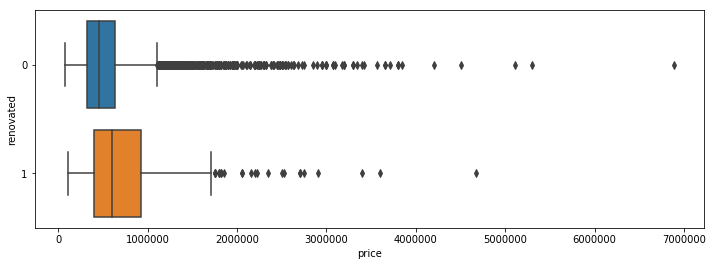

renovated 与 price 的点二列相关系数中 r = 0.12001849968412436，p = 2.088308248694044e-33
basement_present 与 price 的点二列相关系数中 r = 0.18330716277977743，p = 2.7139191120161128e-76


In [22]:
from scipy.stats import pointbiserialr

# 绘制箱形图
plt.figure(figsize=(12, 4))
sns.boxplot(y='renovated', x='price', data=kc_train, orient='h')
plt.show()

# 计算点二列相关系数
r, p = pointbiserialr(kc_train['renovated'], kc_train['price'])
print ('renovated 与 price 的点二列相关系数中 r = %s，p = %s' %(r, p))
r, p = pointbiserialr(kc_train['basement_present'], kc_train['price'])
print ('basement_present 与 price 的点二列相关系数中 r = %s，p = %s' %(r, p))

可以看出来：

- 没有翻新过的箱形图比较窄，这表明整体而言这组房价非常接近
- 有无翻新对于房价高低没有太大的影响，一般而言翻新后房价可能会高一点
- renovated、basement_present和price变量之间的相关性都较小


接下来我们再探究各个顺序变量（ordinal variable）和price之间的关系，用斯皮尔曼等级相关系数（Spearman's rank-order correlation）来计算相关性

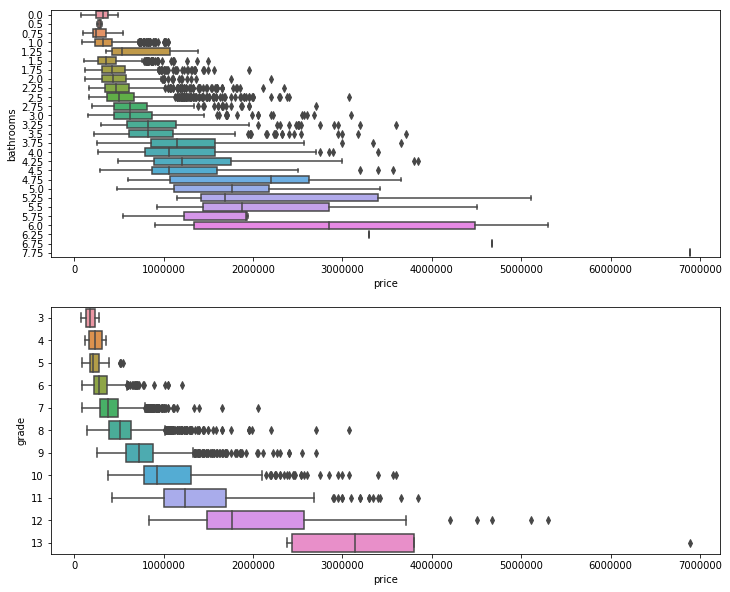

In [23]:
plt.figure(figsize=(12, 10))
plt.subplot(211)
sns.boxplot(y='bathrooms', x='price', data=kc_train, orient='h')
plt.subplot(212)
sns.boxplot(y='grade', x='price', data=kc_train, orient='h')
plt.show()

In [24]:

from scipy.stats import spearmanr

r, p = spearmanr(kc_train['floors'], kc_train['price'])
print ('floors 和 price 斯皮尔曼相关系数为 %s，其中 p = %s' %(r,p))
r, p = spearmanr(kc_train['bedrooms'], kc_train['price'])
print ('bedrooms 和 price 斯皮尔曼相关系数为 %s，其中 p = %s' %(r,p))
r, p = spearmanr(kc_train['bathrooms'], kc_train['price'])
print ('bathrooms 和 price 斯皮尔曼相关系数为 %s，其中 p = %s' %(r,p))
r, p = spearmanr(kc_train['grade'], kc_train['price'])
print ('grade 和 price 斯皮尔曼相关系数为 %s，其中 p = %s' %(r,p))

floors 和 price 斯皮尔曼相关系数为 0.3127190036471108，其中 p = 9.586333125228778e-226
bedrooms 和 price 斯皮尔曼相关系数为 0.3458697748314727，其中 p = 5.6801269872902106e-279
bathrooms 和 price 斯皮尔曼相关系数为 0.5012034892956143，其中 p = 0.0
grade 和 price 斯皮尔曼相关系数为 0.6603554146361819，其中 p = 0.0


scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate')

参数解释：

- a,b：是一维或二维数组，b是可选的。
- axis：整型或者空值，如果axis = 0（默认值），则每列代表一个变量，并在行中进行观察。如果axis = 1，则转换关系：每行代表一个变量，而列包含观察值。
- nan_policy : {‘propagate’, ‘raise’, ‘omit’}, 都是可选的，定义输入包含nan时的处理方式。'propagate'返回- --- nan，'raise'抛出错误，'omit'执行忽略nan值的计算。默认为'propagate'。

返回值：

- correlation：Spearman相关矩阵或相关系数
- pvalue：浮点数，假设检验的双侧p值，其零假设是两组数据不相关，具有与rho相同的维度。

我们可以得出以下结论：

- 连续变量中sqft_living、sqft_above、sqft_basement与price之间存在极强的相关关系
- 二元变量basement_present、renovated与price之间存在一定的相关关系，但是关联度较小
- 几个顺序变量（floors、bedrooms、bathrooms、grade）都与price之间存在相关关系

## 数据预处理

虚拟变量（dummy variable）是指用0或1来表示某个特定的分类是否存在的人工变量，这里我们对floors、grade做编码处理，将bedrooms和bathrooms看作是连续变量。

In [25]:
ordinal_cols = ['floors', 'grade']

for col in ordinal_cols:
    dummies = pd.get_dummies(kc_train[col], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(col))
    kc_train.drop(col, axis=1, inplace=True)
    kc_train = kc_train.join(dummies)

In [26]:
kc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
price               10000 non-null int64
bedrooms            10000 non-null int64
bathrooms           10000 non-null float64
sqft_living         10000 non-null int64
sqft_lot            10000 non-null int64
sqft_above          10000 non-null int64
sqft_basement       10000 non-null int64
yr_built            10000 non-null int64
yr_renovated        10000 non-null int64
lat                 10000 non-null float64
long                10000 non-null float64
basement_present    10000 non-null int64
renovated           10000 non-null int64
floors#1.0          10000 non-null uint8
floors#1.5          10000 non-null uint8
floors#2.0          10000 non-null uint8
floors#2.5          10000 non-null uint8
floors#3.0          10000 non-null uint8
floors#3.5          10000 non-null uint8
grade#3             10000 non-null uint8
grade#4             10000 non-null uint8
grade#5             10000

由于连续变量太多还有包含yr_renovated这类比较难以处理的变量，所以这里我们暂不做数据归一化处理。接下来我们再分割训练集。

In [27]:
from sklearn.cross_validation import train_test_split
np.random.seed(21)
target = kc_train['price']
kc_train.drop('price', axis=1, inplace=True)
train_data, val_data, train_y, val_y = train_test_split(
    kc_train, target, train_size=0.8, random_state=21
)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 模型训练与特征选择

## 简单线性回归

我们先选择使用一个简单的线性回归模型来对单一特征进行训练。

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def simple_linear_model(train_data, train_y, val_data, val_y, input_feature):
    reg = LinearRegression()
    reg.fit(train_data.as_matrix(columns=[input_feature]), train_y)
    RMSE = mean_squared_error(
        val_y, reg.predict(val_data.as_matrix(columns=[input_feature]))
    ) ** 0.5
    return RMSE

np.random.seed(21)
RMSE = simple_linear_model(train_data, train_y, val_data, val_y, 'sqft_living')
print('Validation RMSE for sqft_living is: %s' % RMSE)

Validation RMSE for sqft_living is: 240277.31977171928
